# Data Loading and Cleaning

In [1]:
import clean

In [3]:
df = clean.load_data('probe_data\\0')
df.describe()

,Unnamed: 0,heading,latitude,longitude,speed
count,1.073190e+07,1.073190e+07,1.073190e+07,1.073190e+07,1.073190e+07
mean,2.336031e+05,1.829833e+02,5.354864e+01,9.958580e+00,2.155214e+01
std,1.781384e+05,9.799313e+01,1.990308e-03,4.646094e-03,1.655580e+01
min,0.000000e+00,0.000000e+00,5.354123e+01,9.948704e+00,0.000000e+00
25%,9.582000e+04,8.700000e+01,5.354649e+01,9.955093e+00,6.000000e+00
50%,1.968810e+05,1.970000e+02,5.354948e+01,9.958657e+00,2.000000e+01
75%,3.260210e+05,2.690000e+02,5.354984e+01,9.962498e+00,3.500000e+01
max,8.422780e+05,3.590000e+02,5.355191e+01,9.966670e+00,2.200000e+02


In [4]:
%pip install datashader

Note: you may need to restart the kernel to use updated packages.


# Simulation of a typical roundabout journey

This code simulates how a roundabout journey would behave with typical perfect data.

It defines the time steps for a complete traversal and simulates the delta heading in five phases:
1. Gradual right turn (increase in delta heading)
2. Gradual left turn before the roundabout (decrease in delta heading)
3. Constant delta inside the roundabout (smooth turn)
4. Gradual right turn while exiting (delta heading increases)
5. Heading stabilizes after exit (delta approaches zero)

The delta heading is then integrated to get the heading over time. The results are plotted to show both the heading and delta heading over the time steps.

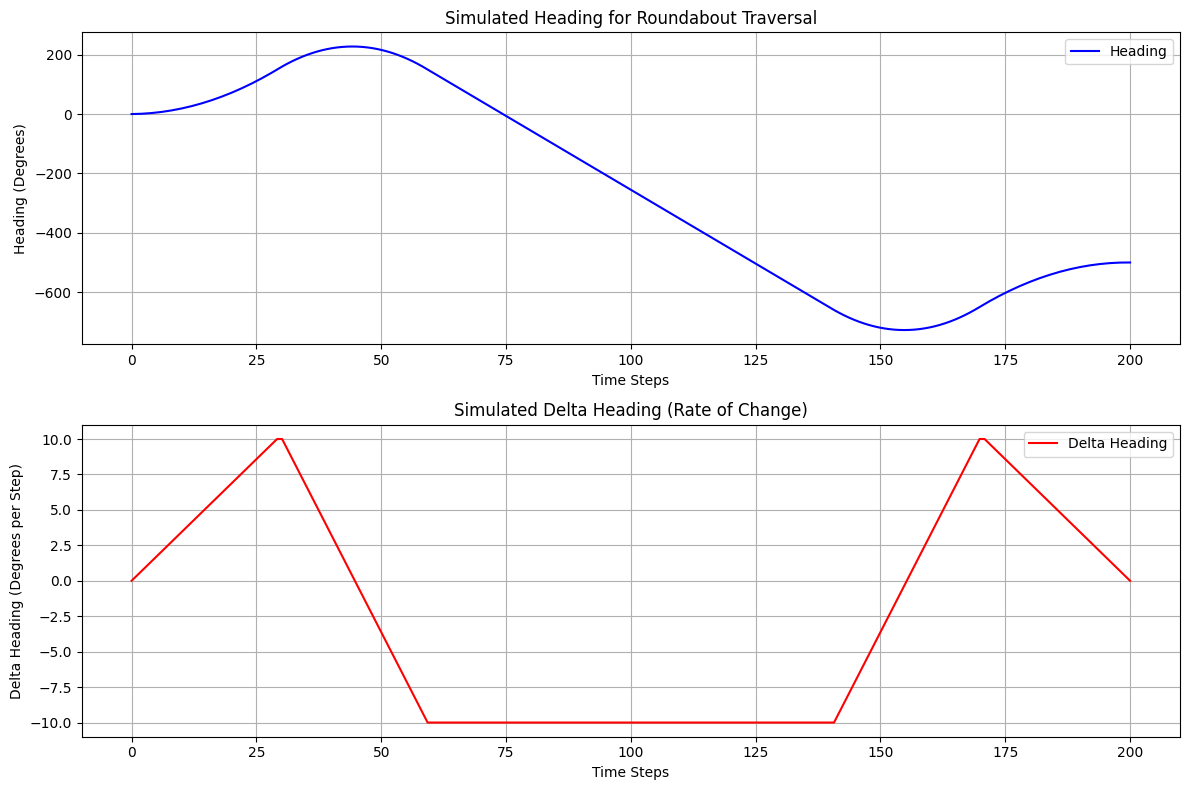

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time steps (simulating 200 steps for a complete traversal)
time_steps = np.linspace(0, 200, 200)

# Simulating the delta heading based on the description
delta_heading_sim = np.zeros_like(time_steps)

# Phase 1: Gradual right turn (increase in delta heading)
delta_heading_sim[:30] = np.linspace(0, 10, 30)  # Delta increases

# Phase 2: Gradual left turn before roundabout (decrease in delta heading)
delta_heading_sim[30:60] = np.linspace(10, -10, 30)  # Delta decreases

# Phase 3: Constant delta inside the roundabout (smooth turn)
delta_heading_sim[60:140] = np.linspace(-10, -10, 80)  # Constant heading

# Phase 4: Gradual right turn while exiting (delta heading increases)
delta_heading_sim[140:170] = np.linspace(-10, 10, 30)  # Delta increases again

# Phase 5: Heading stabilizes after exit (delta approaches zero)
delta_heading_sim[170:] = np.linspace(10, 0, 30)  # Delta goes to zero

# Now, integrate the delta_heading_sim to get the heading over time
heading_sim = np.cumsum(delta_heading_sim)

# Plot the heading and delta heading
plt.figure(figsize=(12, 8))

# Plot the heading
plt.subplot(2, 1, 1)
plt.plot(time_steps, heading_sim, label="Heading", color='b')
plt.title("Simulated Heading for Roundabout Traversal")
plt.xlabel("Time Steps")
plt.ylabel("Heading (Degrees)")
plt.grid(True)
plt.legend()

# Plot the delta heading
plt.subplot(2, 1, 2)
plt.plot(time_steps, delta_heading_sim, label="Delta Heading", color='r')
plt.title("Simulated Delta Heading (Rate of Change)")
plt.xlabel("Time Steps")
plt.ylabel("Delta Heading (Degrees per Step)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Comparison with Real Data
Focusing on a roundabout to see if it matches the simulation.

In [66]:
import clean

# Example usage
cleaned_data_6 = clean.clean_speed_data('probe_data\\6')
print(cleaned_data_6.describe())

          Unnamed: 0        heading       latitude      longitude  \
count  125968.000000  125968.000000  125968.000000  125968.000000   
mean     3487.925076     149.087999      53.439899      10.305905   
std      2792.291307     102.408504       0.003396       0.004187   
min         0.000000       0.000000      53.435539      10.294699   
25%      1232.000000      68.000000      53.436165      10.302819   
50%      2703.000000     157.000000      53.440473      10.306120   
75%      5184.250000     251.000000      53.442538      10.310025   
max     12686.000000     359.000000      53.446240      10.312649   

               speed  z_score_speed  
count  125968.000000  125968.000000  
mean       52.854225       0.198504  
std        14.873205       0.767529  
min        21.000000      -1.445327  
25%        43.000000      -0.310021  
50%        53.000000       0.206027  
75%        62.000000       0.670470  
max       107.000000       2.992687  


In [64]:
df_r6 = cleaned_data_6.copy()
df_r6.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,within_circle,diff_headers
60650,644,72.0,53.435563,10.307516,01QmikpoRRKRp18dlMCwg,2024-07-11 04:42:23,55.0,0.309237,False,4.0
60651,645,72.0,53.435607,10.307729,01QmikpoRRKRp18dlMCwg,2024-07-11 04:42:24,54.0,0.257632,False,1.0
60652,646,72.0,53.435648,10.307948,01QmikpoRRKRp18dlMCwg,2024-07-11 04:42:25,54.0,0.257632,False,0.0
60653,647,72.0,53.435688,10.308176,01QmikpoRRKRp18dlMCwg,2024-07-11 04:42:26,55.0,0.309237,False,-35.0
60654,648,73.0,53.435725,10.308405,01QmikpoRRKRp18dlMCwg,2024-07-11 04:42:27,55.0,0.309237,False,25.0


In [10]:
df_r6.describe()

,Unnamed: 0,heading,latitude,longitude,speed,z_score_speed
count,125968.000000,125968.000000,125968.000000,125968.000000,125968.000000,125968.000000
mean,3487.925076,149.087999,53.439899,10.305905,52.854225,0.198504
std,2792.291307,102.408504,0.003396,0.004187,14.873205,0.767529
min,0.000000,0.000000,53.435539,10.294699,21.000000,-1.445327
25%,1232.000000,68.000000,53.436165,10.302819,43.000000,-0.310021
50%,2703.000000,157.000000,53.440473,10.306120,53.000000,0.206027
75%,5184.250000,251.000000,53.442538,10.310025,62.000000,0.670470
max,12686.000000,359.000000,53.446240,10.312649,107.000000,2.992687


In [11]:
df_r6.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed
0,0,6.0,53.439129,10.303048,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:09,64.0,0.773680
1,1,5.0,53.439605,10.303117,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:10,64.0,0.773680
2,2,31.0,53.440708,10.303525,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:11,28.0,-1.084093
3,3,290.0,53.441306,10.302329,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:12,42.0,-0.361626
4,4,331.0,53.441579,10.301660,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:13,38.0,-0.568045


# Visualization

# Folium Map Creation

In this section, we create a map using the `folium` library. The map is centered on a specific point with coordinates (longitude, latitude) and includes a circle and a marker.

1. **Center Point**: The map is centered at the coordinates (10.303665749999947, 53.44088975).
2. **Circle**: A circle with a radius of 35 meters is added to the map.
3. **Marker**: A marker is placed at the center point with a popup displaying the coordinates.

The map is saved as `circle_map.html`.

### Explanation of the Code

This code snippet uses the `folium` library to create an interactive map centered on a specific geographic point. Below is a step-by-step explanation of the code:

1. **Import the `folium` Library**

2. **Define the Center Point**

3. **Create a Map**

4. **Add a Circle**

5. **Add a Marker**

6. **Save the Map**



In [12]:
import folium

center_lon, center_lat = 10.303665749999947, 53.44088975

m = folium.Map(location=[center_lat, center_lon], zoom_start=15)

folium.Circle(
    location=[center_lat, center_lon],
    radius=35,  # radius in meters
    color='blue',
    fill=True,
    fillColor='blue',
    fillOpacity=0.2
).add_to(m)

folium.Marker(
    location=[center_lat, center_lon],
    popup=f"Center: {center_lat:.4f}, {center_lon:.4f}"
).add_to(m)

m.save('circle_map.html')

print("Map saved as 'circle_map.html'")

Map saved as 'circle_map.html'


In [13]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


# Data inside circle

## Filtering and Visualizing Data Points within a Radius

This code snippet demonstrates how to filter data points within a specified radius from a center point and visualize them on a map using the `folium` library. The steps are as follows:

1. **Import Libraries**:
    - `pandas` for data manipulation.
    - `folium` for map visualization.
    - `geopy.distance` for calculating distances between geographical points.

2. **Define Center Point and Radius**:
    - The center point is defined by its latitude and longitude.
    - The radius is set to 35 meters.

3. **Function to Calculate Distance from Center Point**:
    - A function `distance_from_center` is defined to calculate the distance between a given point and the center point using the `geodesic` method from `geopy.distance`.

4. **Calculate Distances and Filter DataFrame**:
    - The distance of each point in the DataFrame `df_r6` from the center point is calculated and stored in a new column `distance`.
    - The DataFrame is then filtered to include only those points whose distance is less than or equal to the specified radius.

5. **Create a Map Centered on the Point**:
    - A `folium.Map` object is created, centered on the specified latitude and longitude, with an initial zoom level of 15.

6. **Add a Circle to the Map**:
    - A circle with the specified radius is added to the map to visually represent the area of interest.

7. **Add Markers for Filtered Points**:
    - For each point in the filtered DataFrame, a `folium.CircleMarker` is added to the map. Each marker represents a data point and includes a popup displaying the `traceid`.

8. **Save the Map**:
    - The map is saved as an HTML file named `filtered_data_map.html`.



## Map of Cleaned Trace IDs and Their Path within the Radius of the Roundabout

This cell will give us the map of the cleaned trace IDs and their path within the radius of the roundabout.

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic

center_lon, center_lat = 10.303665749999947, 53.44088975
radius = 35  # meters



def distance_from_center(row):
    return geodesic((center_lat, center_lon), (row['latitude'], row['longitude'])).meters

df_r6['distance'] = df_r6.apply(distance_from_center, axis=1)
df_filtered = df_r6[df_r6['distance'] <= radius]

m = folium.Map(location=[center_lat, center_lon], zoom_start=15)


folium.Circle(
    location=[center_lat, center_lon],
    radius=radius,
    color='blue',
    fill=True,
    fillColor='blue',
    fillOpacity=0.2
).add_to(m)

# Add markers for each point in the filtered DataFrame
# for idx, row in df_filtered.sample(100).iterrows():
for idx, row in df_filtered.sample(100).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        popup=f"{row['traceid']}"
    ).add_to(m)

# Save the map
m.save('filtered_data_map.html')

print("Map saved as 'filtered_data_map.html'")
print(f"Filtered DataFrame:\n{df_filtered}")

In [15]:
point = df_filtered[df_filtered['traceid'] == 'xjNYku5QeamgCqNYufPA']
point.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,distance
35468,7574,15.0,53.440947,10.303887,xjNYku5QeamgCqNYufPA,2024-07-09 17:51:46,21.0,-1.445327,16.047981
35469,7575,30.0,53.441004,10.303931,xjNYku5QeamgCqNYufPA,2024-07-09 17:51:47,27.0,-1.135698,21.739494
35470,7576,46.0,53.441051,10.304003,xjNYku5QeamgCqNYufPA,2024-07-09 17:51:48,27.0,-1.135698,28.709594


## Now we filter for only one `traceid` to visualize it.

In [93]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)


trace = df_filtered[df_filtered['traceid'] == 'XTG0uvEzQn6MNc38X9wNw']
for i in trace.iterrows():
    folium.CircleMarker(
        location=[i[1]['latitude'], i[1]['longitude']],
        radius=5,
        popup=f"{i[1]['traceid']}, {i[1]['speed']}"
    ).add_to(m)

# Save the map
m.save('one_trace.html')

print("Map saved as 'one_trace.html'")

Map saved as 'one_trace.html'


In [96]:
df_r6[df_r6['traceid'] == 'XTG0uvEzQn6MNc38X9wNw'][df_r6['within_circle'] == True]

C:\Users\Shehab\AppData\Local\Temp\ipykernel_2152\394537521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_r6[df_r6['traceid'] == 'XTG0uvEzQn6MNc38X9wNw'][df_r6['within_circle'] == True] # BACK HERE


,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,within_circle,diff_headers
67,67,126.0,53.441019,10.303223,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:38,34.0,-0.774465,True,3.0
68,68,133.0,53.440967,10.303326,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:39,31.0,-0.929279,True,1.0
69,69,146.0,53.440908,10.303406,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:40,30.0,-0.980884,True,1.0
70,70,163.0,53.440839,10.303448,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:42,29.0,-1.032489,True,1.0
71,71,197.0,53.440667,10.303407,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:43,37.0,-0.619650,True,1.0


In [17]:
df_r6[df_r6['traceid'] == 'PVM2dYzSkedoxYZqTzFyA'].describe()

,Unnamed: 0,heading,latitude,longitude,speed,z_score_speed,distance
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,3423.613636,88.462121,53.439746,10.306743,47.969697,-0.053561,422.244434
std,2827.114761,106.629229,0.003186,0.003391,10.383442,0.535836,235.141049
min,1286.000000,3.000000,53.435548,10.301337,21.000000,-1.445327,16.112285
25%,1320.750000,9.000000,53.436232,10.303180,42.750000,-0.322922,217.512279
50%,1353.500000,35.000000,53.440228,10.307404,50.500000,0.077015,468.058902
75%,7201.250000,87.000000,53.441757,10.310104,55.000000,0.309237,645.226993
max,7234.000000,358.000000,53.446182,10.312638,64.000000,0.773680,787.351188


## Using the given roundabouts data we set a radius suitable for each one to be used during training later correctly

1. **Load Roundabouts Data**


2. **Define Radii**:
    - A list of radii for the roundabouts is defined.

3. **Initialize Map**:
    - The map is centered on the first roundabout's coordinates with an initial zoom level of 15.

4. **Create Circles and Markers**:
    - For each roundabout, a circle and a marker are added to the map.
    - The circle represents the roundabout's area with a specified radius.
    - The marker displays the center coordinates and radius in a popup.


In [19]:
all_roundabouts = pd.read_csv("hamburg_extra_layers\\hamburg_rounsabouts.csv")
radii = [33.5, 20, 22, 56, 20, 24, 20, 15, 30, 13, 20, 15, 24, 24, 30]

center_lon, center_lat = all_roundabouts.iloc[0]['longitude'], all_roundabouts.iloc[0]['latitude']
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
circles = {'centers': [], 'radius': []}

for i, (index, ra) in enumerate(all_roundabouts.iterrows()):
    center_lon, center_lat = ra['longitude'], ra['latitude']
    radius = radii[i] if i < len(radii) else 35

    folium.Circle(
        location=[center_lat, center_lon],
        radius=radius,  
        color='blue',
        fill=True,
        fillColor='blue',
        fillOpacity=0.2
    ).add_to(m)


    folium.Marker(
        location=[center_lat, center_lon],
        popup=f"Center: {center_lat:.4f}, {center_lon:.4f}, Radius: {radius}m"
    ).add_to(m)

    circles['centers'].append((center_lat, center_lon))
    circles['radius'].append(radius)


m.save('all_roundabouts.html')

## Visualizing Roads
 * We try visualizing the roads using data from the 'full_hamburg_navstreets.csv' file.
 * The CSV file contains information about the streets in Hamburg, which is used to create a visual representation of the road network.

In [20]:
navstreets = pd.read_csv('hamburg_extra_layers\\full_hamburg_navstreets.csv')
navstreets.head()

,Unnamed: 0,nav_link_id,postalname,common_name,dir_travel,func_class,speed_cat,fr_spd_lim,to_spd_lim,from_lanes,to_lanes,lane_cat,divider,route_type,bridge,tunnel,urban,st_name,geometry
0,0,171216714,N,Y,T,5,7,0,30,0,0,1,N,0.0,N,N,Y,Schiffbeker Weg,"LINESTRING (10.11952 53.56261, 10.12007 53.56351)"
1,1,10438590753,N,Y,B,5,7,30,30,0,0,1,N,0.0,N,N,Y,Francoper Straße,"LINESTRING (9.86344 53.47212, 9.86344 53.47216..."
2,2,10098763174,N,Y,B,5,7,30,30,0,0,1,N,0.0,N,N,Y,Francoper Straße,"LINESTRING (9.86318 53.47642, 9.86317 53.47681)"
3,3,10438590755,N,Y,B,5,7,30,30,0,0,1,N,0.0,N,N,Y,Francoper Straße,"LINESTRING (9.86331 53.47144, 9.86339 53.47153..."
4,4,10438590756,N,Y,B,5,7,30,30,0,0,1,N,0.0,N,N,Y,Francoper Straße,"LINESTRING (9.86346 53.47177, 9.86346 53.47179..."



## Visualizing Specific Street
The purpose of this code is to extract and process the geographical coordinates of a specific street named "Klosterstern" from a dataset of navigational streets. The coordinates are then stored in a list for further use, such as mapping or spatial analysis.

### Code Breakdown

1. **Define the Center Coordinates of Klosterstern**

2. **Load Line Strings from the Dataset**

3. **Extract Coordinates from Line Strings**


In [21]:
from shapely import wkt

In [22]:
klosterstern_center = [53.5817, 9.9886]
# shapely.wkt.loads(navstreets['wkt_geom'].iloc[0])
line_strings = wkt.loads(navstreets[navstreets['st_name'] == 'Klosterstern']['geometry'])

lines = []
for i in line_strings:
    lines.append(list(i.coords))

In [23]:
print(lines)
for i, line in enumerate(lines):
    for j, tup in enumerate(line):
        new_tup = tuple([tup[1], tup[0]])
        lines[i][j] = new_tup
print(lines)

[[(9.98864, 53.58128), (9.98876, 53.58129), (9.98887, 53.58131), (9.98897, 53.58134), (9.98905, 53.58138), (9.98916, 53.58144)], [(9.98864, 53.58128), (9.98851, 53.58129), (9.9884, 53.5813), (9.98825, 53.58134), (9.98813, 53.58139), (9.98802, 53.58146), (9.98795, 53.58152)], [(9.98916, 53.58144), (9.98923, 53.5815), (9.98928, 53.58156), (9.98931, 53.58162), (9.98933, 53.5817), (9.98932, 53.58178), (9.98929, 53.58186), (9.98926, 53.58191)], [(9.98926, 53.58191), (9.98922, 53.58195), (9.98916, 53.582), (9.98906, 53.58206), (9.98897, 53.5821), (9.98882, 53.58214), (9.9887, 53.58216), (9.98857, 53.58217)], [(9.98799, 53.58196), (9.98807, 53.58203), (9.98817, 53.58208), (9.98828, 53.58212), (9.98837, 53.58214), (9.98848, 53.58216), (9.98857, 53.58217)], [(9.98795, 53.58152), (9.98791, 53.58158), (9.98789, 53.58165), (9.98787, 53.58173), (9.98788, 53.58181), (9.98792, 53.58188), (9.98799, 53.58196)]]
[[(53.58128, 9.98864), (53.58129, 9.98876), (53.58131, 9.98887), (53.58134, 9.98897), (53.58

In [24]:
lines[0]

[(53.58128, 9.98864),
 (53.58129, 9.98876),
 (53.58131, 9.98887),
 (53.58134, 9.98897),
 (53.58138, 9.98905),
 (53.58144, 9.98916)]

In [25]:
m = folium.Map(location=klosterstern_center, zoom_start=17)

for line in lines:
    folium.PolyLine(
        locations=line,
        color='blue',
        weight=5,
        opacity=0.8
    ).add_to(m)

m.save('linestring_map.html')

print("Map saved as 'linestring_map.html'")

Map saved as 'linestring_map.html'


## Visualizing Links

In [27]:
roadlinks = pd.read_csv('hamburg_extra_layers\\hamburg_road_links.csv')
roadlinks.head()

,bbox,full_id,maxspeed,lanes,highway,wkt_geom
0,13,w167905883,NaN,2.0,tertiary,"LineString (9.9945231 53.5857163, 9.9951456 53..."
1,5,w30992172,50,3.0,secondary,"LineString (10.0116887 53.4948632, 10.0115095 ..."
2,12,w44779855,50,4.0,primary,"LineString (9.9549149 53.5698337, 9.9547046 53..."
3,8,w922264842,50,2.0,secondary,"LineString (10.1248753 53.5861638, 10.1248787 ..."
4,5,w25520037,50,2.0,secondary,"LineString (10.0272456 53.5038651, 10.0270433 ..."


In [28]:
from shapely import wkt
# shapely.wkt.loads(navstreets['wkt_geom'].iloc[0])
line_strings = wkt.loads(roadlinks['wkt_geom'])

lines = []
for i in line_strings:
    lines.append(list(i.coords))

In [29]:
print(lines)
for i, line in enumerate(lines):
    for j, tup in enumerate(line):
        new_tup = tuple([tup[1], tup[0]])
        lines[i][j] = new_tup
print(lines)

[[(9.9945231, 53.5857163), (9.9951456, 53.5869074), (9.9955095, 53.5876945), (9.9956119, 53.5879113), (9.9957863, 53.5884899)], [(10.0116887, 53.4948632), (10.0115095, 53.4951263), (10.0111641, 53.4956273), (10.011061, 53.4957415), (10.0109434, 53.4958438), (10.0108133, 53.4959249), (10.0106365, 53.4960041), (10.0104866, 53.4960693), (10.0103187, 53.4961252), (10.0100829, 53.4961792), (10.0098278, 53.4962341)], [(9.9549149, 53.5698337), (9.9547046, 53.5697324), (9.9546377, 53.5696999)], [(10.1248753, 53.5861638), (10.1248787, 53.5862893), (10.1248798, 53.58633), (10.1248669, 53.586411), (10.1248483, 53.5864839), (10.1248191, 53.5865593), (10.1247186, 53.5867266)], [(10.0272456, 53.5038651), (10.0270433, 53.5039407), (10.0268035, 53.5040303), (10.0264963, 53.5041403), (10.0261309, 53.5043076), (10.0257452, 53.5045152), (10.0252511, 53.5048629), (10.0251932, 53.5049045), (10.0247245, 53.50527), (10.0236418, 53.5061576)], [(9.9984489, 53.4636899), (9.9985277, 53.4637374), (9.9985709, 53.4

In [30]:
m = folium.Map(location=klosterstern_center, zoom_start=17)

for line in lines:
    folium.PolyLine(
        locations=line,
        color='blue',
        weight=5,
        opacity=0.8
    ).add_to(m)

m.save('roadlinks_linestring_map.html')

print("Map saved as 'roadlinks_linestring_map.html'")

Map saved as 'roadlinks_linestring_map.html'


## Feature engineering and modeling


### Explanation of the Code

The function `is_point_within_any_circle` checks if a given point is within any of the specified circles. The circles are defined by their centers and radii.

##### Function: `is_point_within_any_circle`

**Parameters:**
- `point` (tuple): A tuple containing the latitude and longitude of the point to be checked.
- `circles` (dict): A dictionary containing two keys:
    - `centers`: A list of tuples, each representing the latitude and longitude of a circle's center.
    - `radius`: A list of radii corresponding to each circle center.

**Returns:**
- `bool`: Returns `True` if the point is within any of the circles, otherwise `False`.

**Code Explanation:**
1. The function iterates over each circle's center and radius.
2. For each circle, it calculates the distance between the point and the circle's center using the `geodesic` method from the `geopy.distance` module.
3. If the distance is less than or equal to the circle's radius, the function returns `True`.
4. If the point is not within any circle, the function returns `False`.


In [31]:
def is_point_within_any_circle(point, circles):
    centers = circles['centers']
    radius = circles['radius']
    for center, radius in zip(centers, radius):
        distance = geodesic(center, point).meters
        if distance <= radius:
            return True
    return False

In [32]:
cleaned_data_6.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed
0,0,6.0,53.439129,10.303048,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:09,64.0,0.773680
1,1,5.0,53.439605,10.303117,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:10,64.0,0.773680
2,2,31.0,53.440708,10.303525,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:11,28.0,-1.084093
3,3,290.0,53.441306,10.302329,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:12,42.0,-0.361626
4,4,331.0,53.441579,10.301660,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:13,38.0,-0.568045


In [76]:
cleaned_data_6['within_circle'] = cleaned_data_6.apply(lambda row: is_point_within_any_circle((row['latitude'], row['longitude']), circles), axis=1)

In [77]:
cleaned_data_6.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,diff_headings,within_circle
0,0,6.0,53.439129,10.303048,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:09,64.0,0.773680,-7.0,False
1,1,5.0,53.439605,10.303117,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:10,64.0,0.773680,-1.0,False
2,2,31.0,53.440708,10.303525,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:11,28.0,-1.084093,26.0,True
3,3,290.0,53.441306,10.302329,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:12,42.0,-0.361626,259.0,False
4,4,331.0,53.441579,10.301660,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:13,38.0,-0.568045,41.0,False


In [92]:
cleaned_data_6[cleaned_data_6['traceid'] == 'XTG0uvEzQn6MNc38X9wNw'][cleaned_data_6['within_circle'] == True] # BACK HERE

C:\Users\Shehab\AppData\Local\Temp\ipykernel_2152\2457340898.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data_6[cleaned_data_6['traceid'] == 'XTG0uvEzQn6MNc38X9wNw'][cleaned_data_6['within_circle'] == True]


,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,diff_headings,within_circle
67,67,126.0,53.441019,10.303223,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:38,34.0,-0.774465,6.0,True
68,68,133.0,53.440967,10.303326,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:39,31.0,-0.929279,7.0,True
69,69,146.0,53.440908,10.303406,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:40,30.0,-0.980884,13.0,True
70,70,163.0,53.440839,10.303448,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:42,29.0,-1.032489,17.0,True
71,71,197.0,53.440667,10.303407,XTG0uvEzQn6MNc38X9wNw,2024-07-08 04:02:43,37.0,-0.619650,34.0,True


### Testing with a full trace

This code snippet creates an interactive map using the `folium` library to visualize the geographical trace of a *specific `traceid`* from the `cleaned_data_6` DataFrame.

In [ ]:
m = folium.Map(location=[53.440850, 10.303533], zoom_start=15)

trace = cleaned_data_6[cleaned_data_6['traceid'] == 'QnI9pcKCQUG00JiFNu4uBQ']
print(trace)
for i in trace.iterrows():
    folium.CircleMarker(
        location=[i[1]['latitude'], i[1]['longitude']],
        radius=3,
        popup=f"{i[1]['traceid']}, heading={i[1]['heading']}, within_circle={i[1]['within_circle']}"
    ).add_to(m)

# Save the map
m.save('one_trace.html')

print("Map saved as 'one_trace.html'")

### Getting headings differences

The function `get_diff_in_headings` gets the difference between 2 consequtive points.

##### Function: `get_diff_in_headings`

**Parameters:**
- `df` (pandas.DataFrame): dataframe containing probe data

**Returns:**
- `pandas.Series`: Returns `Series` that represents difference in headings

**Code Explanation:**
1. The function sorts values by traceid and sampledate.
2. groups dataframe by traceid, and calculates heading difference, fills NAN of first row since it has no previous values to subtract from.

In [129]:
def get_diff_in_headings(df):
    df = df.sort_values(by=['traceid', 'sampledate'])
    return df.groupby('traceid')['heading'].diff().fillna(0)

cleaned_data_6['diff_headings'] = get_diff_in_headings(cleaned_data_6)
cleaned_data_6.head()

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,diff_headings,within_circle
0,0,6.0,53.439129,10.303048,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:09,64.0,0.773680,-7.0,False
1,1,5.0,53.439605,10.303117,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:10,64.0,0.773680,-1.0,False
2,2,31.0,53.440708,10.303525,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:11,28.0,-1.084093,26.0,True
3,3,290.0,53.441306,10.302329,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:12,42.0,-0.361626,259.0,False
4,4,331.0,53.441579,10.301660,u0CBk9CrQQ6nq6WKkbz7Kw,2024-07-08 03:37:13,38.0,-0.568045,41.0,False


## Logistic Regression on Geospatial Data
This code performs a logistic regression analysis to predict whether a data point is within a specific region (circle) based on several features.

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [142]:
X = cleaned_data_6[['diff_headings', 'speed']] 
y = cleaned_data_6['within_circle']
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [143]:
X

,diff_headings,speed
0,-7.0,64.0
1,-1.0,64.0
2,26.0,28.0
3,259.0,42.0
4,41.0,38.0
...,...,...
138658,16.0,25.0
138659,2.0,23.0
138660,-17.0,22.0
138661,-22.0,22.0


The function `prepare_dataset` prepares dataset contains all pre-processing needed. 

##### Function: `prepare_dataset`

**Parameters:**
- `dir_path` (os.Path | str): path to the directory of probe data
- `get_within_circle` (bool): whether to make the returned dataframe contain `within_circle` attribute or not
    - `within_circle` is a `bool` attribute saying if the (lat, lon) is inside a roundabout or about enter a roundabout.

**Returns:**
- `pandas.DataFrame`: Returns preprocessed dataframe

**Code Explanation:**
1. 


In [131]:
# load, clean, transform, add new features.
def prepare_dataset(dir_path, get_within_circle=True):
    df = clean.clean_speed_data(dir_path)
    df['heading'] = df['heading'].astype(np.float64)
    if get_within_circle:
        df['within_circle'] = df.apply(lambda row: is_point_within_any_circle((row['latitude'], row['longitude']), circles), axis=1)
    
    df['diff_headings'] = get_diff_in_headings(df)
    return df

## Testing on Area 3 data
This code takes a new dataset (area3_data), uses the trained logistic regression model (logreg) to make predictions, and then stores those predictions in the dataset.

In [134]:
area3_data = prepare_dataset('probe_data\\3')

In [144]:
testing_data = area3_data[['diff_headings', 'speed']]
testing_data.head()

,diff_headings,speed
6,0.0,44.0
7,-6.0,46.0
8,6.0,44.0
9,0.0,44.0
10,-1.0,44.0


In [145]:
pred = logreg.predict(testing_data)
pred

array([False, False, False, ..., False, False, False])

In [146]:
testing_data['predictions'] = pred
testing_data.head()

C:\Users\Shehab\AppData\Local\Temp\ipykernel_2152\807454970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data['predictions'] = pred


,diff_headings,speed,predictions
6,0.0,44.0,False
7,-6.0,46.0,False
8,6.0,44.0,False
9,0.0,44.0,False
10,-1.0,44.0,False


In [158]:
area3_data.iloc[:500]

,Unnamed: 0,heading,latitude,longitude,traceid,sampledate,speed,z_score_speed,within_circle,diff_headings
6,6,277.0,53.606864,9.870519,7wAghzHSzajRWfbDKkXjg,2024-07-08 01:50:38,44.0,1.230669,False,0.0
7,7,271.0,53.606787,9.870263,7wAghzHSzajRWfbDKkXjg,2024-07-08 01:50:39,46.0,1.349806,False,-6.0
8,8,277.0,53.606791,9.870072,7wAghzHSzajRWfbDKkXjg,2024-07-08 01:50:40,44.0,1.230669,False,6.0
9,9,277.0,53.606796,9.869875,7wAghzHSzajRWfbDKkXjg,2024-07-08 01:50:41,44.0,1.230669,False,0.0
10,10,276.0,53.606800,9.869678,7wAghzHSzajRWfbDKkXjg,2024-07-08 01:50:42,44.0,1.230669,False,-1.0
...,...,...,...,...,...,...,...,...,...,...
1071,1071,211.0,53.602726,9.857991,gY6Pjzy5S1yhuN1bjQvxPQ,2024-07-08 05:51:40,44.0,1.230669,False,-3.0
1072,1072,208.0,53.602622,9.857901,gY6Pjzy5S1yhuN1bjQvxPQ,2024-07-08 05:51:41,45.0,1.290238,False,-3.0
1073,1073,202.0,53.602517,9.857838,gY6Pjzy5S1yhuN1bjQvxPQ,2024-07-08 05:51:42,44.0,1.230669,False,-6.0
1074,1074,199.0,53.602409,9.857778,gY6Pjzy5S1yhuN1bjQvxPQ,2024-07-08 05:51:43,44.0,1.230669,False,-3.0


## Visualize Predicted Values

In [163]:
m = folium.Map(location=[area3_data.iloc[0]['latitude'], area3_data.iloc[0]['longitude']], zoom_start=15)

for idx, (i, d) in enumerate(zip(testing_data[:500].iterrows(), area3_data.iloc[:500].iterrows())):
    folium.CircleMarker(
        location=[d[1]['latitude'], d[1]['longitude']],
        radius=3,
        popup=f"heading={i[1]['diff_headings']}, predictions={i[1]['predictions']}, within_circle={d[1]['within_circle']}",
        color='green' if i[1]['predictions'] else 'red'
    ).add_to(m)

m.save('test_trace.html')

## Model Evaluation

In [171]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(area3_data['within_circle'], testing_data['predictions'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.8284422436373756


In [170]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(area3_data['within_circle'], testing_data['predictions']).ravel()
false_positive_rate = fp / (fp + tn)
print(f'False Positive Rate: {false_positive_rate}')

False Positive Rate: 0.1660046444309398


## Setting up MLFlow

In [181]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment('Tabular approach')
with mlflow.start_run():
    mlflow.sklearn.log_model(logreg, "logistic_regression_model")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("False Positive Rate", false_positive_rate)
    mlflow.log_artifact("test_trace.html", artifact_path="maps")
    mlflow.log_param("Model Params", "NA")
    mlflow.log_param("input columns", "diff_headings, speed")

2024/10/16 13:19:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
